In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes1.csv', squeeze=True)
data.dropna(axis=0,how='any',inplace=True)
data.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_22308\3703326468.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv('diabetes1.csv', squeeze=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0


In [27]:
x = data.drop(['Outcome','DiabetesPedigreeFunction'], axis=1)
y = data['Outcome']

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [30]:
newData = [[2, 1, 0, 0, 1, 0, 0]]
predict = model.predict(newData)
print(predict)

[0.]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(ytest, ypred, labels=[0, 1])
print("Confusion Matrix we want is: \n", conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print("True Positives", TP)
print("True Negatives", TN)
print("False Positives", FP)
print("False Negatives", FN)


Confusion Matrix we want is: 
 [[85 14]
 [18 32]]
True Positives 85
True Negatives 32
False Positives 18
False Negatives 14


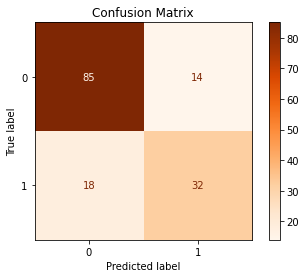

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(conf)
matrix.plot(cmap='Oranges')
plt.title("Confusion Matrix")
plt.show()

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(ytest, ypred):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(ytest, ypred):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(ytest, ypred):.3}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(ytest, ypred):.3}")

Recall Score: 0.64
Specitivity Score: 0.64
Precision Score: 0.696
Negative Prediction Value: 0.696
F1 Score: 0.667
Matthews Correlation Coefficient: 0.51


0.7492929292929292


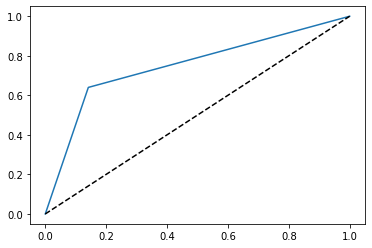

In [34]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, ypred)
area = auc(fpr, tpr)
print(area)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')